In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Описание

Как и SVM, **деревья принятия решений** являются универсальным алгоритмом МО, который может решать как задачи классификации, так и задачи регрессии. Это очень мощный алгоритм, способный обучаться на сложном наборе данных.

Деревья принятия решений являются ключевым компонентом в построении **случайных лесов**.

# Классификация

Визуализировать дерево можно с помощью функции из `sklearn.tree` - `export_graphviz`. 

После создания файла **.dot** через командную строку необходимо использовать утилиту **dot**, чтобы привести файл в форма png.

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris = load_iris(as_frame=False)
X = iris['data'][:, :2]
y = iris['target']

In [5]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(tree,
                out_file='iris_example.dot',
                feature_names=iris['feature_names'][:2],
                class_names=iris['target_names'], 
                filled=True, rounded=True)

In [7]:
!dot -Tpng iris_example.dot -o iris_example.png

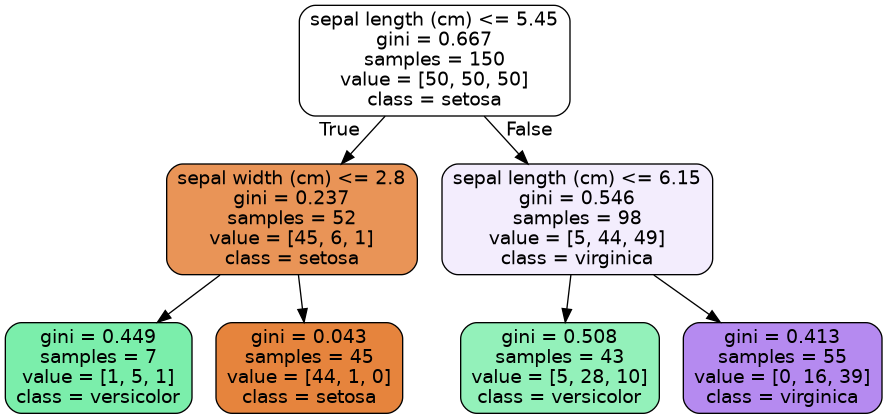

In [8]:
from IPython.display import Image

Image(data='iris_example.png')

Итак, посмотрим, как же дерево составляет свои прогнозы. Для определения класса, к которому относится Ирис, необходимо начать с **корневого узла** (глубина 0 - самый вверх): этот узел спрашивает насколько длина больше/меньше какого-то значения и, если оно удовлетворяет условию, то необходимо двигаться дальше влево или вправо в зависимости от условий.

Так нужно двигаться вплоть до **листового узла** - т.е. те, которые не имеют потомков.

**Gini** показывает меру **загрязненности**. Узел "чист" (gini=0), когда все образцы принадлежат одному классу. Формула для вычисления загрязненности gini:

$$G_i=1-\sum_{k=1}^np_{i,k}^2$$

К примеру, самый левый лист имеет загрязненность равную $1-(1/7)^2-(5/7)^2-(1/7)^2 = 0.449$.

При этом, $p_{i,k}$ показывает долю образцов $k$ класса в $i^{ом}$ узле.

Дерево принятия решений может также оценить вероятность того, что образец принадлежит конкретному классу $k$. Для начала необходимо произвести прогноз: пройти от корня дерева к его листу, а затем определить долю образцов, представляющих класс $k$, от всех образцов в узле.

In [9]:
tree.predict_proba([[5.48, 2.6]])

array([[0.11627907, 0.65116279, 0.23255814]])

# CART

Итак, Sklearn использует **алгоритм дерева классификации и регрессии** или **Classification and Regression Tree (CART)** алгоритм для построения и обучения деревьев.

Суть очень простая: алгоритм разделяет обучающий набор на два поднабора используя один признак $k$  и границу решений $t_k$ (ну к примеру, ширина ≤ 3.5m). Как же определить $k$ и $t_k$? Алгоритм ищет пару ($k, t_k$)  такую, чтобы разделить набор на чистые поднаборы, пытаясь минимизировать функцию потерь:

 

$$J(k, t_k)=\frac{m_{left}}mG_{left}+\frac{m_{right}}mG_{right}$$

где

$$G_{left/right}\ измеряет\ загрязненность\ левого/правого\  поднабора \\
m_{left/right} - количество\ образцов\ в\ левом/правом\ поднаборе$$

# Вычислительная сложность

Вычислительная сложность предсказания - $O(\log_2 m)$  
Вычислительная сложность построения дерева - $O(m\cdot n\log_2 m)$

# Визуализация

Давайте обучим классификатор на основе дерева принятия решений без каких-либо ограничений, чтобы посмотреть, как он составляет прогнозы.

In [42]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

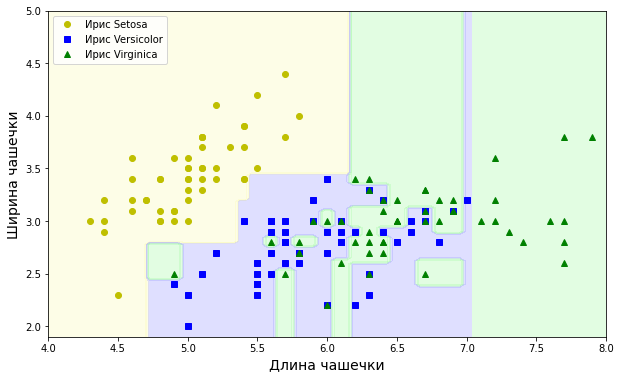

In [43]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 6))

x1s = np.linspace(4, 8, 100)
x2s = np.linspace(1.9, 5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Ирис Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Ирис Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Ирис Virginica")
plt.legend(loc='upper left')
plt.xlabel("Длина чашечки", fontsize=14)
plt.ylabel("Ширина чашечки", fontsize=14)

plt.show()

Можно заметить, как сильно переобучается дерево, если не применить к нему никакую регуляризацию. Можно попробовать изменить гиперпараметр **max_depth** и посмотреть как изменится картинка.

Логика регуляризации деревьев простая: увеличивая **min_*** гиперпараметры или уменьшая **max_*** гиперпараметры, можно регуляризовать модель.

# Регрессия

Деревья принятия решений также способны в задачу регрессии.

In [78]:
from sklearn.tree import DecisionTreeRegressor

m = 200
X = np.linspace(-3, 3, m).reshape(-1, 1)
y = 2 * X**2 + 0.5 * X + 6 + 2 * np.random.randn(m, 1)

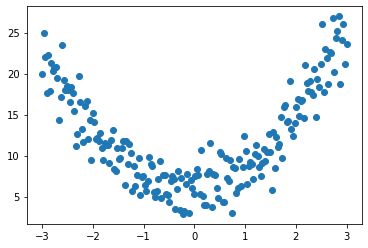

In [79]:
plt.scatter(X, y)
plt.show()

In [89]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [96]:
export_graphviz(tree,
                out_file='tree_regression.dot',
                filled=True, rounded=True)

In [97]:
!dot -Tpng tree_regression.dot -o tree_regression.png

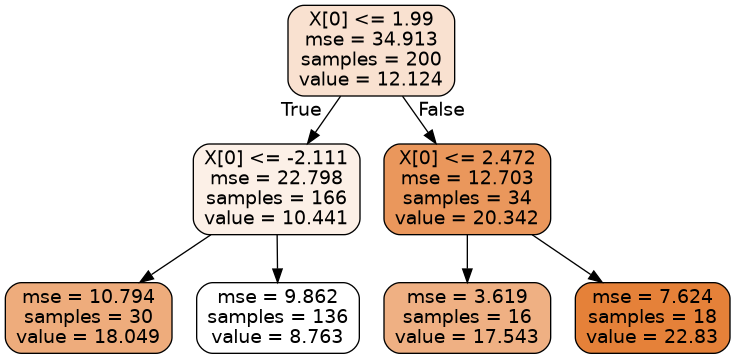

In [98]:
from IPython.display import Image

Image(data='tree_regression.png')

Дерево для регрессии очень похоже на дерево для классификации. Основное отличие в том, что вместо предсказанного класса в каждом узле стоит предсказанное значение. 

К примеру, если значение $x$ такое, что $x \le -2.111$, то значение **value** будет равно 18.049, что является средним значением 30 образцов, принадлежащие этому узлу, а их среднее mse - 10.794.

В случае регрессии CART строит дерево аналогично классификации, однако теперь вместо уменьшения загрязненности алгоритм старается уменьшить ошибку MSE.

$$J(k,t_k)=\frac{m_{left}}mMSE_{left}+\frac{m_{right}}mMSE_{right}$$

Теперь аналогично задача классификации посмотрим как строит прогнозы дерево в случае задачи регрессии. Сравнение проведем по параметру `max_depth`.

In [122]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=2)

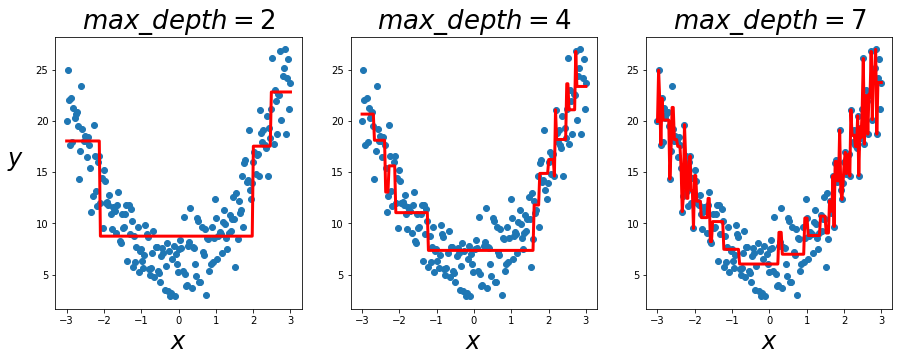

In [123]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(X, y)

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
y_pred = tree.predict(X)
plt.plot(X, y_pred, 'r-', linewidth=3)
plt.title('$max\_depth=2$', fontsize=26)
plt.ylabel('$y$', fontsize=24, rotation=0, labelpad=20)
plt.xlabel('$x$', fontsize=24)

plt.subplot(132)
plt.scatter(X, y)

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X, y)
y_pred = tree.predict(X)
plt.plot(X, y_pred, 'r-', linewidth=3)
plt.title('$max\_depth=4$', fontsize=26)
plt.xlabel('$x$', fontsize=24)

plt.subplot(133)
plt.scatter(X, y)

tree = DecisionTreeRegressor(max_depth=7)
tree.fit(X, y)
y_pred = tree.predict(X)
plt.plot(X, y_pred, 'r-', linewidth=3)
plt.title('$max\_depth=7$', fontsize=26)
plt.xlabel('$x$', fontsize=24)
plt.show()